# Retrieving data from OpenStreetMap

## What is OpenStreetMap?

:::{figure} images/osm-logo_256x256px.svg
:name: osm-logo
:alt: The logo of OpenStreetMap (OSM)

OpenStreetMap is a free and open map service, but - first and foremost - it is
a collaborative global effort to collect free and open geodata. *Source:
[wiki.openstreetmap.org](https://wiki.openstreetmap.org/wiki/Logos)*
:::

OpenStreetMap (OSM) is a global collaborative (crowd-sourced) database and
project that aims at creating a free editable map of the world containing of
information about our environment. It contains data about streets, buildings,
different services, and landuse, to mention but a few.
The collected data is also basis for the map at [openstreetmap.org](https://openstreetmap.org/). 


:::{admonition} Contribute!
:class: note

You can also sign up as a contributor if you want to add to the database and
map or correct and improve existing data. Read more in the  [OpenStreetMap
Wiki](https://wiki.openstreetmap.org/wiki/Main_Page).
:::


OSM has more than 8 million registered users who contribute around 4 million
changes daily.  Its database contains data that is described by [more than 7
billion nodes](http://wiki.openstreetmap.org/wiki/Stats) (that make up lines,
polygons and other objects).

While the most well-known side of OpenStreetMap is the map itself, that [we
have used as a background map](../lesson-5/static-maps), the project is much
more than that. OSM’s data can be used for many other purposes such as
**routing**, **geocoding**, **education**, and **research**. OSM is also widely
used for humanitarian response, e.g., in crisis areas (e.g. after natural
disasters) and for fostering economic development. Read more about humanitarian
projects that use OSM data from the [Humanitarian OpenStreetMap Team (HOTOSM)
website](https://www.hotosm.org).



## Main tools in this lesson

### OSMnx

This week we will explore a Python package called
[OSMnx](https://github.com/gboeing/osmnx) that can be used to retrieve street
networks from OpenStreetMap, and construct, analyse, and visualise them. OSMnx
can also fetch data about Points of Interest, such as restaurants, schools, and
different kinds of services.  The package also includes tools to find routes on
a network downloaded from OpenStreetMap, and implements algorithms for finding
shortest connections for walking, cycling, or driving.


To get an overview of the capabilities of the package, watch the introductory
video given by the lead developer of the package, Prof. Geoff Boeing: ["Meet
the developer: Introduction to OSMnx package by Geoff
Boeing"](https://www.youtube.com/watch?v=Q0uxu25ddc4&list=PLs9D4XVqc6dCAhhvhZB7aHGD8fCeCC_6N).

There is also a scientific article available describing the package:

> Boeing, G. 2017. ["OSMnx: New Methods for Acquiring, Constructing, Analyzing,
> and Visualizing Complex Street
> Networks."](https://www.researchgate.net/publication/309738462_OSMnx_New_Methods_for_Acquiring_Constructing_Analyzing_and_Visualizing_Complex_Street_Networks)
> Computers, Environment and Urban Systems 65, 126-139.
> doi:10.1016/j.compenvurbsys.2017.05.004

[This
tutorial](https://github.com/gboeing/osmnx-examples/blob/master/notebooks/01-overview-osmnx.ipynb)
provides a practical overview of OSMnx functionalities, and has also inspired
this AutoGIS lesson.


### NetworkX

We will also use [NetworkX](https://networkx.github.io/documentation//)
to manipulate and analyse the street network data retrieved from
OpenStreetMap. NetworkX is a Python package that can be used to create,
manipulate, and study the structure, dynamics, and functions of complex
networks. 


---


## Download and visualise OpenStreetMap data with OSMnx

A useful feature of OSMnx is its easy-to-use tools to download
[OpenStreetMap](http://www.openstreetmap.org) data via the project’s [OverPass
API](http://wiki.openstreetmap.org/wiki/Overpass_API).
In this section, we will learn how to download and visualise the street network
and additional data from OpenStreetMap covering an area of interest.


### Street network

The [`osmnx.graph`
module](https://osmnx.readthedocs.io/en/stable/osmnx.html#module-osmnx.graph)
downloads data to construct a routable road network graph, based on an
user-defined area of interest. This area of interest can be specified, for
instance, using a place name, a bounding box, or a polygon.  Here, we will use
a placename for fetching data covering the Kamppi area in Helsinki, Finland. 

In the place name query, OSMnx uses the Nominatim Geocoding API. This means
that place names should exist in the OpenStreetMap database (run a test search
at [openstreetmap.org](https://www.openstreetmap.org/) or
[nominatim.openstreetmap.org](https://nomination.openstreetmap.org/)).

We will read an OSM street network using OSMnx’s
[graph_from_place()](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.graph.graph_from_place) function:

In [27]:
! pip install osmnx
import osmnx

PLACE_NAME = "Podgorze, Krakow, Poland"
graph = osmnx.graph_from_place(PLACE_NAME)

Check the data type of the graph:

In [28]:
type(graph)

networkx.classes.multidigraph.MultiDiGraph

What we have here is a
[`networkx.MultiDiGraph`](https://networkx.org/documentation/stable/reference/classes/multidigraph.html) object.


OSMnx’s graphs do not have a built-in method to plot them, but the package
comes with a function to do so:

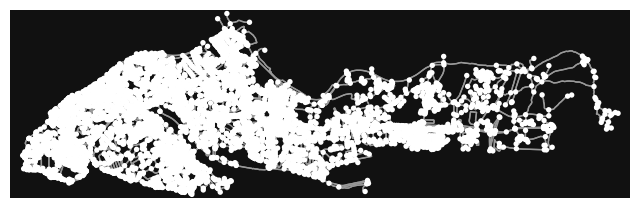

In [29]:
figure, ax = osmnx.plot_graph(graph)

Just as its GeoPandas and Pandas equivalents, `osmnx.plot_graph()` uses
matplotlib. The function returns a `(figure, axes)` tuple, that can be used to
modify the figure using all matplotlib functions we already got to know.

We can see that our graph contains nodes (the points) and edges (the
lines) that connects those nodes to each other.



### Convert a graph to `GeoDataFrame`s

The street network we just downloaded is a *graph*, more specifically a
`networkx.MultiDiGraph`. Its main purpose is to represent the topological
relationships between nodes and the links (edges) between them. Sometimes, it
is more convenient to have the underlying geodata in `geopandas.GeoDataFrame`s.
OSMnx comes with a convenient function that converts a graph into two geo-data
frames, one for nodes, and one for edges:
[`osmnx.graph_to_gdfs()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.utils_graph.graph_to_gdfs).

In [30]:
nodes, edges = osmnx.graph_to_gdfs(graph)

In [31]:
nodes.head()

,y,x,street_count,highway,geometry
osmid,,,,,
34805948,50.036088,19.940779,4,NaN,POINT (19.94078 50.03609)
34805952,50.036546,19.940420,3,NaN,POINT (19.94042 50.03655)
34805953,50.036347,19.940320,4,NaN,POINT (19.94032 50.03635)
206374689,50.045510,19.972616,3,NaN,POINT (19.97262 50.04551)
206374690,50.045169,19.972877,4,traffic_signals,POINT (19.97288 50.04517)


In [32]:
edges.head()

osmid  oneway lanes  \
u        v          key                             
34805948 2421547648 0    1021749730    True     3   
         264004951  0     229004491    True     4   
34805952 34805953   0     263987877    True     3   
34805953 2421547656 0    1021749728    True     3   
         34805948   0      37829138    True     3   

                                                  name  highway maxspeed  \
u        v          key                                                    
34805948 2421547648 0    Generała Henryka Kamieńskiego  primary       50   
         264004951  0       Rondo Antoniego Matecznego  primary       50   
34805952 34805953   0       Rondo Antoniego Matecznego  primary       50   
34805953 2421547656 0                        Wadowicka  primary       50   
         34805948   0       Rondo Antoniego Matecznego  primary       50   

                        width reversed  length  \
u        v          key                          
34805948 2421547648 0     8.5    False  16.621   
         264004951  0    15.5    False  40.942   
34805952 34805953   0     NaN    False  23.296   
34805953 2421547656 0     NaN    False  20.181   
         34805948   0     NaN    False  45.855   

                                                                  geometry  \
u        v          key                                                      
34805948 2421547648 0    LINESTRING (19.94078 50.03609, 19.94099 50.03603)   
         264004951  0    LINESTRING (19.94078 50.03609, 19.94090 50.036...   
34805952 34805953   0    LINESTRING (19.94042 50.03655, 19.94032 50.03635)   
34805953 2421547656 0    LINESTRING (19.94032 50.03635, 19.94022 50.03618)   
         34805948   0    LINESTRING (19.94032 50.03635, 19.94035 50.036...   

                        service access bridge tunnel junction  ref  
u        v          key                                             
34805948 2421547648 0       NaN    NaN    NaN    NaN      NaN  NaN  
         264004951  0       NaN    NaN    NaN    NaN      NaN  NaN  
34805952 34805953   0       NaN    NaN    NaN    NaN      NaN  NaN  
34805953 2421547656 0       NaN    NaN    NaN    NaN      NaN  NaN  
         34805948   0       NaN    NaN    NaN    NaN      NaN  NaN

Nice! Now, as we can see, we have our graph as GeoDataFrames and we can plot
them using the same functions and tools as we have used before.



### Place polygon

Let’s also plot the polygon that represents our area of interest (Kamppi,
Helsinki). We can retrieve the polygon geometry using the
[osmnx.geocode_to_gdf()](https://osmnx.readthedocs.io/en/stable/osmnx.html?highlight=geocode_to_gdf(#osmnx.geocoder.geocode_to_gdf)
function.

In [33]:
# Get place boundary related to the place name as a geodataframe
area = osmnx.geocode_to_gdf(PLACE_NAME)

As the name of the function already tells us, it returns a GeoDataFrame object
based on the specified place name query.  Let’s still verify the data type:

In [34]:
# Check the data type
type(area)

geopandas.geodataframe.GeoDataFrame

Let’s also have a look at the data:

In [35]:
# Check data values
area

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,display_name,class,type,importance
0,"POLYGON ((19.92723 50.03334, 19.92731 50.03312...",50.059873,50.025318,20.103189,19.92723,308141319,relation,2398485,50.0431,19.952961,"Podgórze, Krakow, Lesser Poland Voivodeship, P...",boundary,administrative,0.525872


<AxesSubplot: >

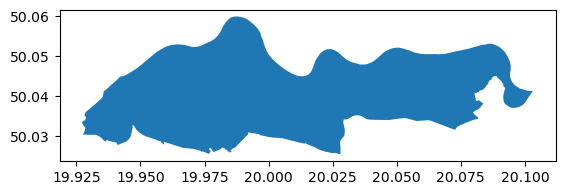

In [36]:
# Plot the area:
area.plot()

### Building footprints

Besides network data, OSMnx can also download any other data contained in the OpenStreetMap database. This includes, for instance, building footprints, and different points-of-interests (POIs). To download arbitrary geometries, filtered by [OSM tags](https://wiki.openstreetmap.org/wiki/Map_features) and a place name, use [`osmnx.geometries_from_place()`](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.geometries.geometries_from_place). The tag to retrieve all [buildings](https://wiki.openstreetmap.org/wiki/Buildings) is `building = yes`.

In [37]:
buildings = osmnx.geometries_from_place(
    PLACE_NAME,
    {"building": True},
)

/tmp/ipykernel_2492/333328696.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  buildings = osmnx.geometries_from_place(


In [38]:
len(buildings) 

10111

In [39]:
buildings.head() 

name  \
element_type osmid                                       
node         1981169884   Zarząd Cmentarzy komunalnych   
             7045154011                            NaN   
             10247410328                       Burgery   
way          25029337              Stopień Wodny Dąbie   
             37638741                               BP   

                                                                   geometry  \
element_type osmid                                                            
node         1981169884                           POINT (19.96265 50.03771)   
             7045154011                           POINT (19.98441 50.04002)   
             10247410328                          POINT (19.96381 50.04823)   
way          25029337     POLYGON ((19.97652 50.05388, 19.97691 50.05342...   
             37638741     POLYGON ((19.97597 50.02621, 19.97602 50.02628...   

                         addr:city addr:housenumber addr:street  \
element_type osmid                                                
node         1981169884     Kraków               13    Wapienna   
             7045154011        NaN              NaN         NaN   
             10247410328       NaN              NaN         NaN   
way          25029337          NaN              NaN         NaN   
             37638741          NaN              NaN         NaN   

                                amenity             brand brand:wikidata  \
element_type osmid                                                         
node         1981169884             NaN               NaN            NaN   
             7045154011   parcel_locker  Paczkomat InPost     Q110970254   
             10247410328      fast_food               NaN            NaN   
way          25029337               NaN               NaN            NaN   
             37638741              fuel               NaN            NaN   

                         opening_hours operator  ... railway:signal_box  \
element_type osmid                               ...                      
node         1981169884            NaN      NaN  ...                NaN   
             7045154011           24/7   InPost  ...                NaN   
             10247410328           NaN      NaN  ...                NaN   
way          25029337              NaN      NaN  ...                NaN   
             37638741              NaN      NaN  ...                NaN   

                         landuse payment:american_express payment:bancomat  \
element_type osmid                                                           
node         1981169884      NaN                      NaN              NaN   
             7045154011      NaN                      NaN              NaN   
             10247410328     NaN                      NaN              NaN   
way          25029337        NaN                      NaN              NaN   
             37638741        NaN                      NaN              NaN   

                         payment:maestro payment:notes payment:visa_debit  \
element_type osmid                                                          
node         1981169884              NaN           NaN                NaN   
             7045154011              NaN           NaN                NaN   
             10247410328             NaN           NaN                NaN   
way          25029337                NaN           NaN                NaN   
             37638741                NaN           NaN                NaN   

                         payment:visa_electron ways type  
element_type osmid                                        
node         1981169884                    NaN  NaN  NaN  
             7045154011                    NaN  NaN  NaN  
             10247410328                   NaN  NaN  NaN  
way          25029337                      NaN  NaN  NaN  
             37638741                      NaN  NaN  NaN  

[5 rows x 193 columns]

As you can see, there are several columns in `buildings`. Each column contains
information about a specific tag that OpenStreetMap contributors have added.
Each tag consists of a key (the column name), and a values (for example
`building=yes` or `building=school`). Read more about tags and tagging
practices in the [OpenStreetMap
wiki](https://wiki.openstreetmap.org/wiki/Tags).

In [40]:
buildings.columns 

Index(['name', 'geometry', 'addr:city', 'addr:housenumber', 'addr:street',
       'amenity', 'brand', 'brand:wikidata', 'opening_hours', 'operator',
       ...
       'railway:signal_box', 'landuse', 'payment:american_express',
       'payment:bancomat', 'payment:maestro', 'payment:notes',
       'payment:visa_debit', 'payment:visa_electron', 'ways', 'type'],
      dtype='object', length=193)

### Points-of-interest

Point-of-interest (POI) is a generic concept that describes point locations
that represent places of interest. As `osmnx.geometries_from_place()` can download any geometry data contained in the OpenStreetMap database, it can also be used to download any kind of POI data. 


In OpenStreetMap, many POIs are described using the [`amenity`
tag](https://wiki.openstreetmap.org/wiki/Key:amenity).  We can, for example,
retrieve all restaurant locations by querying `amenity=restaurant`.

In [41]:
restaurants = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "amenity": "restaurant"
    }
)
len(restaurants) 

/tmp/ipykernel_2492/4276651343.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  restaurants = osmnx.geometries_from_place(


80

As we can see, there are many restaurants in the area.

Let’s explore what kind of attributes we have in our restaurants GeoDataFrame:

In [42]:
# Available columns
restaurants.columns.values 

array(['amenity', 'cuisine', 'name', 'phone', 'source', 'geometry',
       'website', 'addr:city', 'addr:housenumber', 'addr:street',
       'opening_hours', 'check_date', 'check_date:opening_hours', 'level',
       'opening_hours:signed', 'payment:blik', 'payment:contactless',
       'payment:mastercard', 'payment:visa', 'wheelchair',
       'addr:postcode', 'delivery', 'diet:vegan', 'diet:vegetarian',
       'internet_access', 'note', 'reservation', 'takeaway', 'smoking',
       'shop', 'email', 'outdoor_seating', 'description',
       'contact:facebook', 'contact:instagram', 'survey:date',
       'diet:paleo', 'nodes', 'building', 'building:levels',
       'diet:dairy_free', 'diet:egg_free', 'diet:lactose_free',
       'diet:plant-based', 'name:pl', 'self_service'], dtype=object)

As you can see, there is quite a lot of (potential) information related to the
amenities. Let’s subset the columns and inspect the data further. Can we
extract all restaurants’ names, address, and opening hours?

In [43]:
# Select some useful cols and print
interesting_columns = [
    "name",
    "opening_hours",
    "addr:city",
    "addr:country",
    "addr:housenumber",
    "addr:postcode",
    "addr:street"
]

# Print only selected cols
restaurants[interesting_columns].head(10) 

KeyError: "['addr:country'] not in index"

:::{tip}
if some of the information needs an update, head over to [openstreetmap.org](https://openstreetmap.org) and edit the source data!
:::



### Parks and green areas

Let’s try to fetch all public parks in the Kamppi area. In OpenStreetMap,
[parks hould be tagged](https://wiki.openstreetmap.org/wiki/Map_features) as
`leisure = park`.  Smaller green areas (*puistikot*) are sometimes also tagged
`landuse = grass`. We can combine multiple tags in one data query.

In [23]:
parks = osmnx.geometries_from_place(
    PLACE_NAME,
    {
        "leisure": "park",
        "landuse": "grass",
    },
)

/tmp/ipykernel_2492/993052129.py:1: UserWarning: The `geometries` module and `geometries_from_X` functions have been renamed the `features` module and `features_from_X` functions. Use these instead. The `geometries` module and function names are deprecated and will be removed in a future release.
  parks = osmnx.geometries_from_place(


In [24]:
parks.head()

nodes  \
element_type osmid                                                          
way          162925418  [1747182976, 1747182973, 1747182971, 174718296...   
             278349810  [2827295168, 2827295164, 2827295167, 282729517...   
             292210875  [2957517192, 1747208477, 1747208472, 174720847...   
             292210876  [2957517193, 2957517194, 2957517191, 295751718...   
             292210878  [1747202058, 1747202045, 1747202039, 174720204...   

                       landuse  \
element_type osmid               
way          162925418   grass   
             278349810   grass   
             292210875   grass   
             292210876   grass   
             292210878   grass   

                                                                 geometry  \
element_type osmid                                                          
way          162925418  POLYGON ((19.97376 50.08067, 19.97374 50.08064...   
             278349810  POLYGON ((19.97306 50.08099, 19.97305 50.08097...   
             292210875  POLYGON ((19.97032 50.08501, 19.97029 50.08498...   
             292210876  POLYGON ((19.97045 50.08501, 19.97050 50.08501...   
             292210878  POLYGON ((19.97094 50.08503, 19.97097 50.08502...   

                       leisure name natural operator source barrier  
element_type osmid                                                   
way          162925418     NaN  NaN     NaN      NaN    NaN     NaN  
             278349810     NaN  NaN     NaN      NaN    NaN     NaN  
             292210875     NaN  NaN     NaN      NaN    NaN     NaN  
             292210876     NaN  NaN     NaN      NaN    NaN     NaN  
             292210878     NaN  NaN     NaN      NaN    NaN     NaN

<AxesSubplot: >

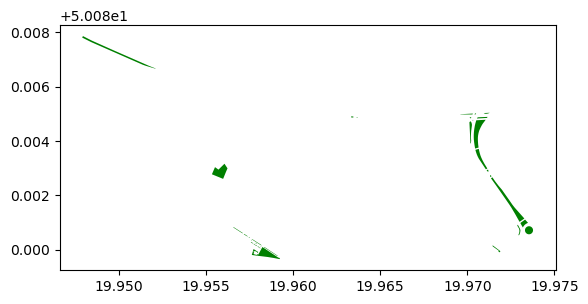

In [25]:
parks.plot(color="green") 

### Plotting the data

Let’s create a map out of the streets, buildings, restaurants, and the area polygon.

<AxesSubplot: >

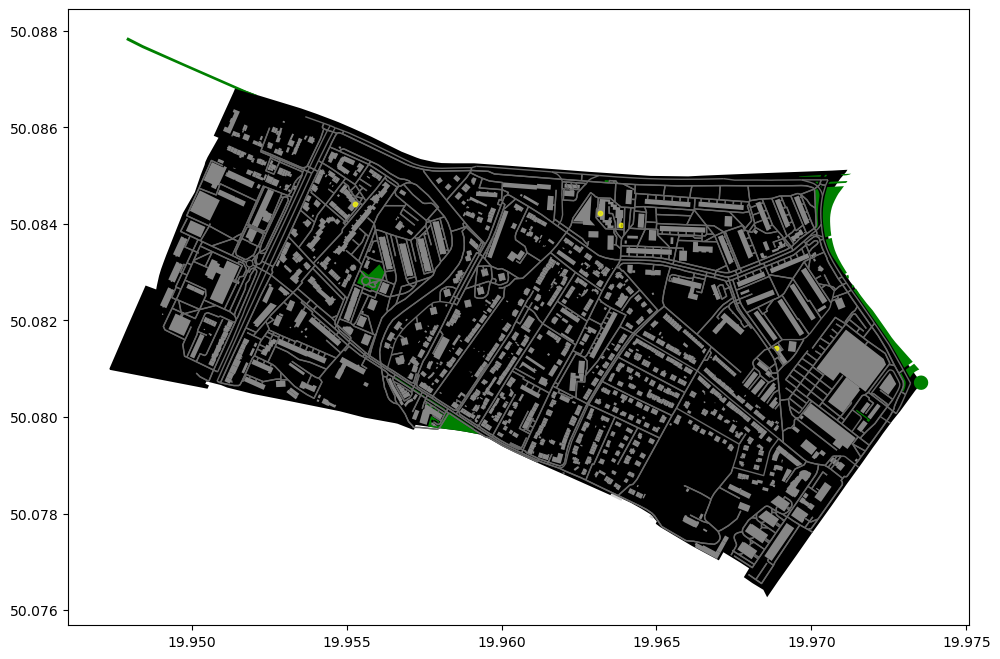

In [26]:
import matplotlib
figure, ax = matplotlib.pyplot.subplots(figsize=(12,8))

# Plot the footprint
area.plot(ax=ax, facecolor="black")

# Plot parks
parks.plot(ax=ax, facecolor="green")

# Plot street ‘edges’
edges.plot(ax=ax, linewidth=1, edgecolor="dimgray")

# Plot buildings
buildings.plot(ax=ax, facecolor="silver", alpha=0.7)

# Plot restaurants
restaurants.plot(ax=ax, color="yellow", alpha=0.7, markersize=10)

Cool! Now we have a map where we have plotted the restaurants, buildings,
streets and the boundaries of the selected region of ‘Olsza’ in Krakow. And
all of this required only a few lines of code. Pretty neat! 

## Advanced reading

To analyse OpenStreetMap data over large areas, it is often more efficient and
meaningful to download the data all at once, instead of separate queries to the
API. Such data dumps from OpenStreetMap are available in various file formats,
OSM [Protocolbuffer Binary
Format](https://wiki.openstreetmap.org/wiki/PBF_Format) (PBF) being one of
them. Data extracts covering whole countries and continents are available, for
instance, at [download.geofabrik.de](https://download.geofabrik.de/).

[Pyrosm](https://pyrosm.readthedocs.io/) is a Python package for reading
OpenStreetMap data from PBF files into `geopandas.GeoDataFrames`. Pyrosm makes
it easy to extract road networks, buildings, Points of Interest (POI), landuse,
natural elements, administrative boundaries and much more - similar to OSMnx,
but taylored to analyses of large areas.  While OSMnx reads the data from the
Overpass API, pyrosm reads the data from a local PBF file.

Read more about fetching and using pbf files as a source for analysing
OpenStreetMap data in Python from the [pyrosm
documentation](https://pyrosm.readthedocs.io/en/latest/basics.html#protobuf-file-what-is-it-and-how-to-get-one).